#Class for Sigmoid Neruon

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.animation as animation

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

#Fit for Toy Data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [153]:
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)
for i in range(20):
  print(sn.w,sn.b)
  sn.fit(X,Y,1,0.5,False)

[[ 0.82411496 -0.46636627]] [-0.00323534]
[[ 1.02827511 -0.19388047]] [-0.05380463]
[[ 1.0261162  -0.46169436]] [-0.1188019]
[[ 1.16086362 -0.29722366]] [-0.1658551]
[[ 1.17328668 -0.45134605]] [-0.21780048]
[[ 1.25650065 -0.3796635 ]] [-0.25684995]
[[ 1.28545217 -0.44440844]] [-0.296353]
[[ 1.33632639 -0.43345721]] [-0.32960368]
[[ 1.37172412 -0.4559146 ]] [-0.36132835]
[[ 1.40904509 -0.4641644 ]] [-0.39012658]
[[ 1.44244645 -0.47591235]] [-0.41700486]
[[ 1.47411583 -0.48588521]] [-0.4419925]
[[ 1.50382709 -0.49547108]] [-0.46535203]
[[ 1.53187007 -0.50448609]] [-0.48725013]
[[ 1.55840426 -0.51301984]] [-0.50784038]
[[ 1.58357814 -0.52111658]] [-0.52725383]
[[ 1.60751899 -0.52881742]] [-0.54560416]
[[ 1.63033754 -0.53615795]] [-0.56299038]
[[ 1.65213058 -0.54316931]] [-0.57949911]
[[ 1.67298319 -0.54987886]] [-0.59520649]


In [0]:



def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  bx =ax.plot()

[[-0.2287047   1.29373521]] [0.00051403]
[[0.05096439 1.19801834]] [0.00637485]
[[0.53903775 1.02410581]] [0.01743815]
[[0.79289501 0.87682445]] [-7.49740315e-05]
[[0.88833854 0.72714566]] [0.00992717]
[[0.96349384 0.50475655]] [0.04281984]
[[1.03793063 0.14633529]] [0.09731679]
[[ 1.04219583 -0.26460233]] [0.08680323]
[[ 1.0643394  -0.43481025]] [0.01252552]
[[ 1.17147783 -0.33227114]] [-0.0467952]
[[ 1.19551187 -0.44616636]] [-0.10582049]
[[ 1.27039315 -0.39472633]] [-0.15401182]
[[ 1.30198557 -0.45159198]] [-0.20037621]
[[ 1.35230073 -0.44199056]] [-0.24036255]
[[ 1.38748461 -0.46504825]] [-0.27781382]
[[ 1.42503904 -0.47239057]] [-0.31168644]
[[ 1.45821511 -0.48445094]] [-0.34308045]
[[ 1.48982651 -0.49415921]] [-0.37208367]
[[ 1.51938951 -0.50366591]] [-0.3990493]
[[ 1.54728054 -0.51255657]] [-0.42419588]
[[ 1.57364584 -0.52097249]] [-0.44772735]
[[ 1.59864042 -0.52895089]] [-0.46981499]
[[ 1.6223944 -0.5365342]] [-0.49060645]
[[ 1.64502098 -0.54375844]] [-0.51022933]
[[ 1.6666189

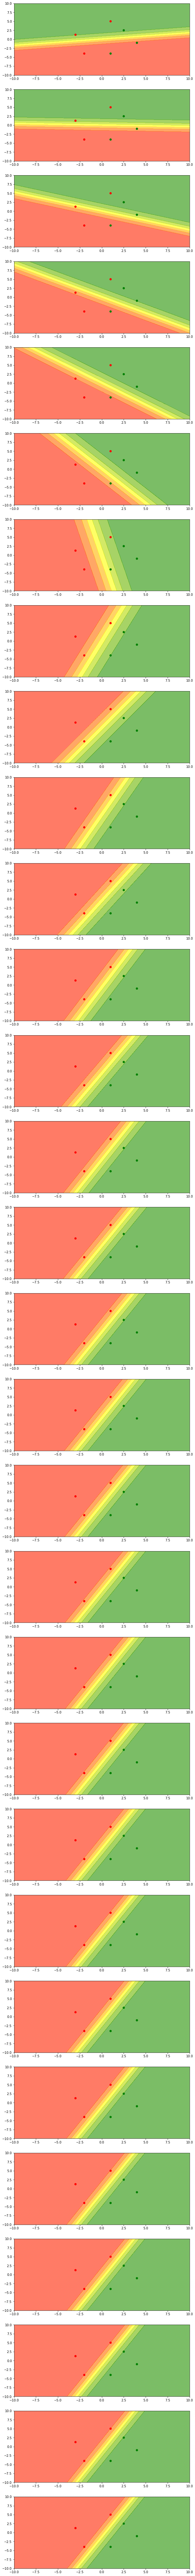

In [155]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)